<a href="https://colab.research.google.com/github/QuantumState745837/OGTIP-DS-P2/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('./HRDataset_v14.csv')

<ipython-input-2-f06f7eb7b1bd>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)


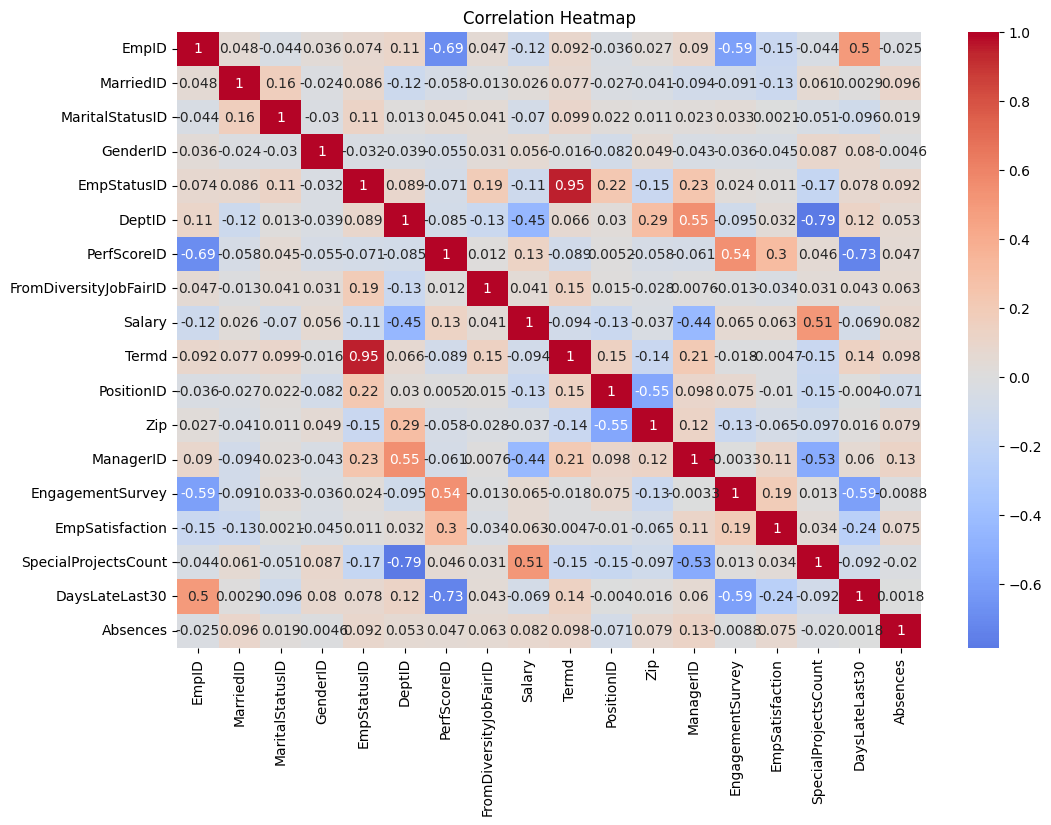

In [2]:
"""
Correlation Heatmap
This is so that we can see what we would want to look at and
help us infer which data correlates with each other
"""

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

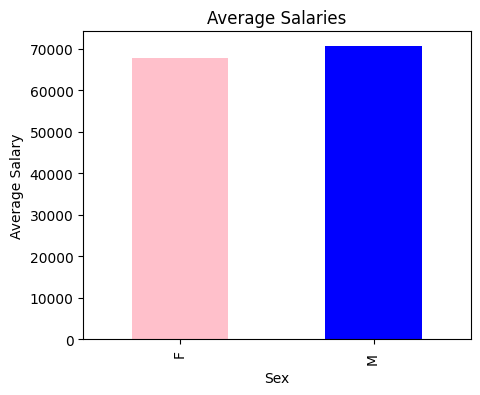

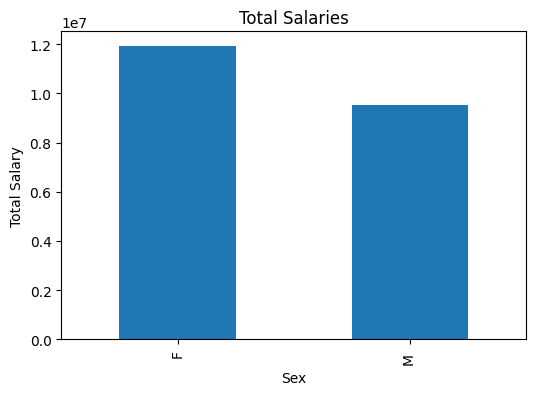

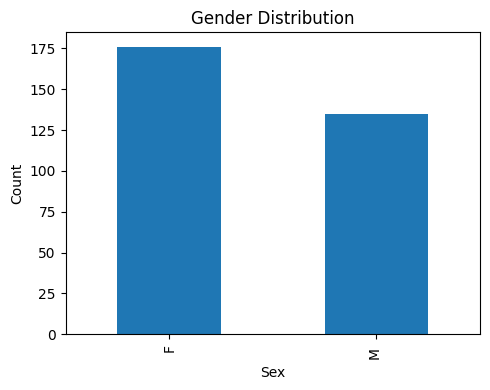

In [16]:
"""
Given the common thought that men and woman get paid different due to sexism.
We are going to be comparing with many statistics here.
"""
mean_salaries = df.groupby('Sex')['Salary'].mean()

plt.figure(figsize=(5, 4))
mean_salaries.plot(kind='bar', color=['pink', 'blue'])
plt.title('Average Salaries')
plt.xlabel('Sex')
plt.ylabel('Average Salary')

total_salaries = df.groupby('Sex')['Salary'].sum()

plt.figure(figsize=(6, 4))
total_salaries.plot(kind='bar')
plt.title('Total Salaries')
plt.xlabel('Sex')
plt.ylabel('Total Salary')

plt.figure(figsize=(5, 4))
df['Sex'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

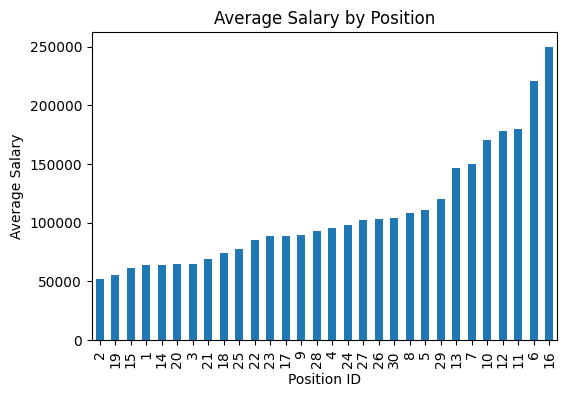

In [18]:
"""
Now the average salary for female is lower than males, but that it potentially
due to the males having the "harder/heavy" tasks.
"""

average_salary_by_position = df.groupby('PositionID')['Salary'].mean()

plt.figure(figsize=(6, 4))
average_salary_by_position.sort_values().plot(kind='bar')
plt.title('Average Salary by Position')
plt.xlabel('Position ID')
plt.ylabel('Average Salary')
plt.show()


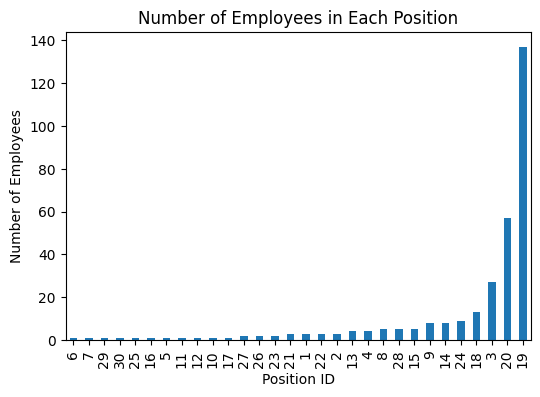

In [28]:
"""
Now that we can see that position ID 16 and 6 make the most money.
Let's see what they are: President & CEO and CIO respectively.

Who are the only "1" in the company. Moving on, let's argue that that
there are just a lot of males in the workforce.
"""

position_counts = df['PositionID'].value_counts()

plt.figure(figsize=(6, 4))
position_counts.sort_values().plot(kind='bar')
plt.title('Number of Employees in Each Position')
plt.xlabel('Position ID')
plt.ylabel('Number of Employees')
plt.show()


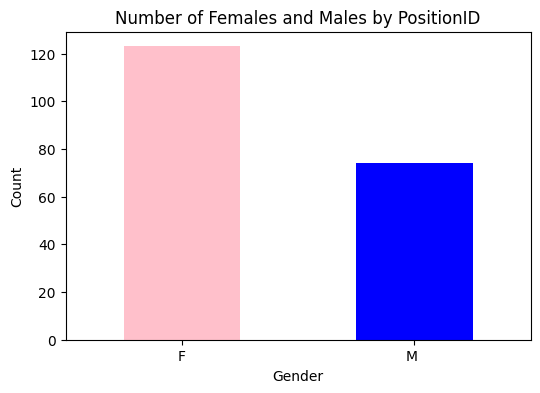

In [33]:
"""
After looking at the specific 3 columns, we can see that they have the most employees
So looking at that we can see how many females and males there are in those 3 specific
positions, being
"""

target_position_ids = [2, 20, 19]

filtered_df = df[df['PositionID'].isin(target_position_ids)]

gender_counts = filtered_df['Sex'].value_counts()

plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['pink', 'blue'])
plt.title('Number of Females and Males by PositionID')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

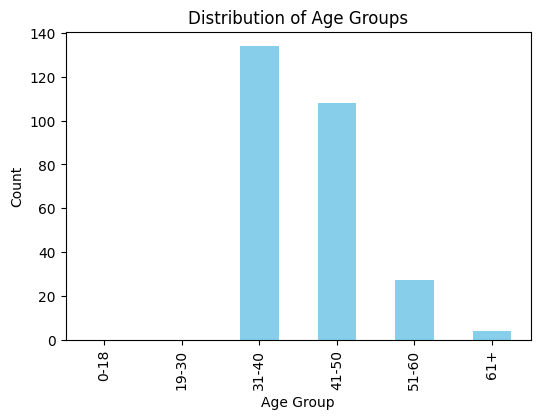

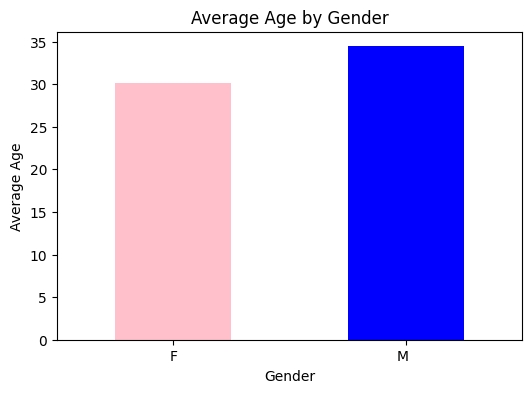

In [32]:
"""
Let's compare to see which gender has the older group
"""
from datetime import datetime

df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')

df['Age'] = (datetime.now() - df['DOB']).astype('<m8[Y]')

age_bins = [0, 18, 30, 40, 50, 60, float('inf')]
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']

df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

age_group_counts = df['Age Group'].value_counts()

plt.figure(figsize=(6, 4))
age_group_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')

average_age_by_gender = df.groupby('Sex')['Age'].mean()

plt.figure(figsize=(6, 4))
average_age_by_gender.plot(kind='bar', color=['pink', 'blue'])
plt.title('Average Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.xticks(rotation=0)
plt.show()

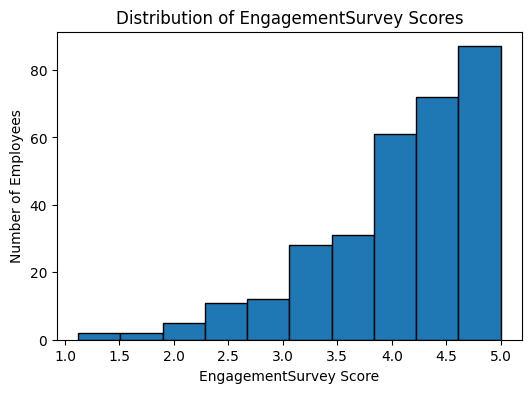

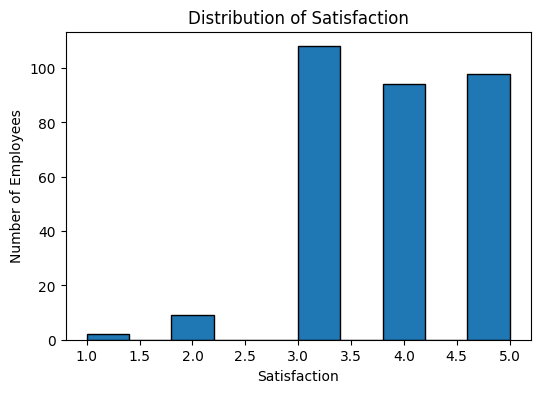

In [40]:
"""
Here we can see that the average age for males is much higher than females.
By nearly 5 years on average. This now makes sense with the reasoning behind
why males make more money on average than females.

Moving away from the salary, we can try to look at the EngagementSurvey and see
how much the employees are liking their work/job
"""

plt.figure(figsize=(6, 4))
plt.hist(df['EngagementSurvey'], edgecolor='black')
plt.title('Distribution of EngagementSurvey Scores')
plt.xlabel('EngagementSurvey Score')
plt.ylabel('Number of Employees')

plt.figure(figsize=(6, 4))
plt.hist(df['EmpSatisfaction'], edgecolor='black')
plt.title('Distribution of Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Number of Employees')
plt.show()

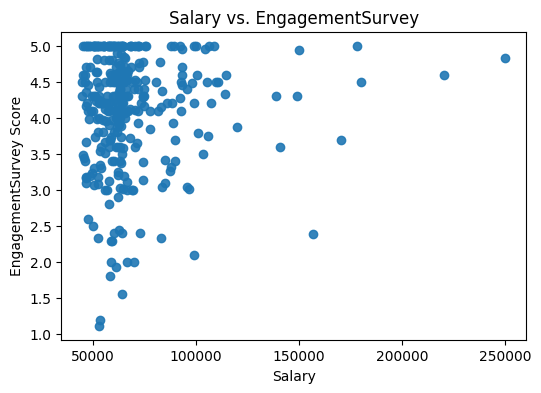

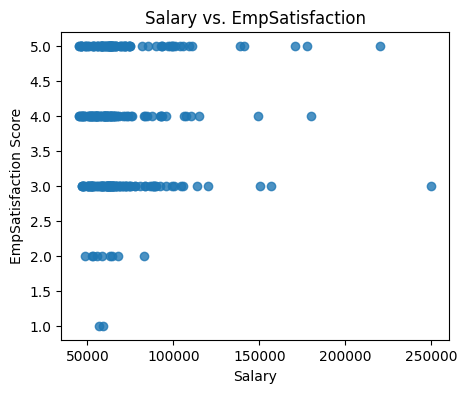

In [45]:
"""
We can see that many employees are "engaged" with their work and like it alot
and are satisified with their work based on the Engagement Survey and Employee
Satisfcation scores. Now back to salary for a bit, let's see if the higher
paying people are happy.
"""

plt.figure(figsize=(6, 4))
plt.scatter(df['Salary'], df['EngagementSurvey'], alpha=0.9)
plt.title('Salary vs. EngagementSurvey')
plt.xlabel('Salary')
plt.ylabel('EngagementSurvey Score')

plt.figure(figsize=(5, 4))
plt.scatter(df['Salary'], df['EmpSatisfaction'], alpha=0.8)
plt.title('Salary vs. EmpSatisfaction')
plt.xlabel('Salary')
plt.ylabel('EmpSatisfaction Score')

plt.show()

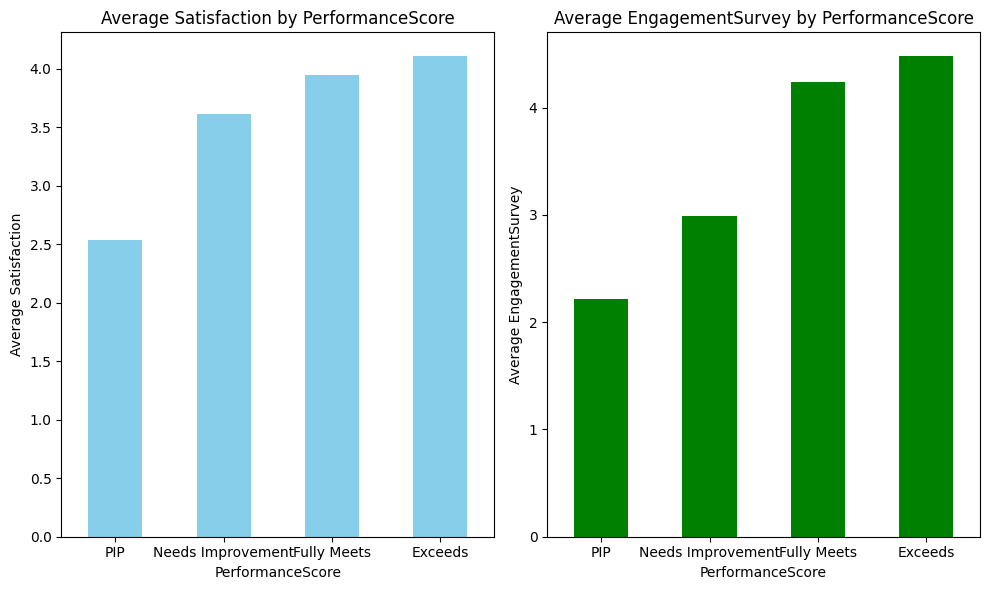

In [48]:
"""
With the graph above we can see that the majority of the lower payed employees
are engaged and also satisified in their work. We can see that as we get higher
in the salary, we can see that the number of employees that have a low
engagement score and satisifaction score lowers. So money can buy happiness. :D

We can now also compare employee engagement and satisfaction with performance score
"""

performance_scores_avg = df.groupby('PerformanceScore')[['EmpSatisfaction', 'EngagementSurvey']].mean()

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
performance_scores_avg['EmpSatisfaction'].sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Satisfaction by PerformanceScore')
plt.xlabel('PerformanceScore')
plt.ylabel('Average Satisfaction')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
performance_scores_avg['EngagementSurvey'].sort_values().plot(kind='bar', color='green')
plt.title('Average EngagementSurvey by PerformanceScore')
plt.xlabel('PerformanceScore')
plt.ylabel('Average EngagementSurvey')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

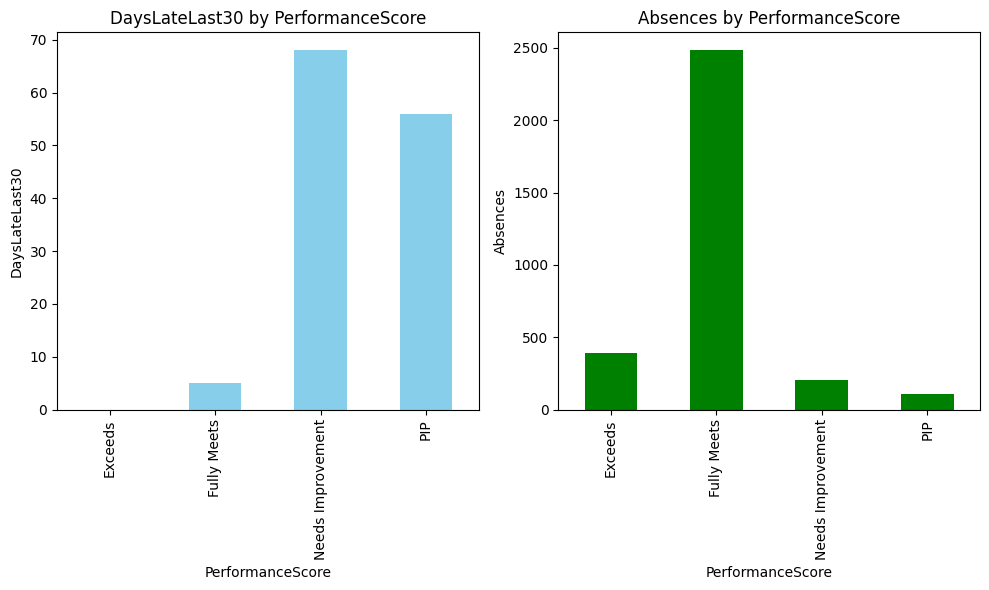

In [55]:
"""
Here we can see that the employees that are working really well, those with
Fully Meets and Exceeds, have high engagement scores and satisifcation compared
to those who are on PIP, "Performance Inprovement Plan"

Moving on with the PIP, we can suspect that employees who are mostly absent or
"away" would have a lower performance than other employees.
"""

performance_scores_avg = df.groupby('PerformanceScore')[['DaysLateLast30', 'Absences']].sum()

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
performance_scores_avg['DaysLateLast30'].plot(kind='bar', color='skyblue')
plt.title('DaysLateLast30 by PerformanceScore')
plt.xlabel('PerformanceScore')
plt.ylabel('DaysLateLast30')

plt.subplot(1, 2, 2)
performance_scores_avg['Absences'].plot(kind='bar', color='green')
plt.title('Absences by PerformanceScore')
plt.xlabel('PerformanceScore')
plt.ylabel('Absences')

plt.tight_layout()
plt.show()

In [ ]:
"""
We can see that yes, the people with a lot of days late in the past 30 days
are those who need improvment or are on an improvement plan, PIP. However,
absences does not correctlate to having poor performance as shown on the green
graph on the right.
"""